# AI/ML Internship Project
###Project Type - Classification
###Contribution - Individual
###Implemented by - Siddharth Vishwakarma


## Project Summary -
This project focuses on building a convolutional neural network (CNN) with TensorFlow/Keras to classify fish images into 11 categories. The dataset, extracted from a zip file and split into training, validation, and test folders, is loaded using Keras’ image_dataset_from_directory function with images resized to 224×224 pixels and batched in groups of 32. To improve efficiency, the data pipeline uses caching and prefetching. The CNN architecture includes a rescaling layer, three convolution–max pooling stages (with 32, 64, and 128 filters), a flattening layer, a dense layer of 64 neurons with ReLU activation, and a final softmax output layer. The model is trained using the Adam optimizer and sparse categorical crossentropy loss for five epochs, with validation during training, and is then evaluated on the test set to assess its accuracy.

In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [ ]:
import zipfile  # Importing zipfile module to work with ZIP files

# Extracting ZIP file from Google Drive to 'Fish_Dataset' folder in current directory
with zipfile.ZipFile("/content/drive/MyDrive/Dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("Fish_Dataset")


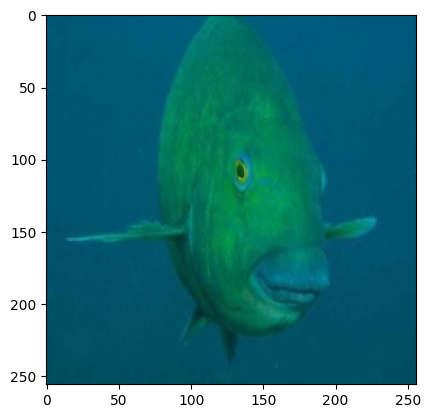

In [ ]:
import matplotlib.image as mpimg  # Importing image reading function from matplotlib

# Reading the image file from the path
my_img = mpimg.imread('/content/Fish_Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train/animal fish/01KOCK58MEGR.jpg')

plt.imshow(my_img)


In [ ]:
my_img.shape #checking shape of an image

(256, 256, 3)

In [ ]:
# Defining path to the training,testing and validation dataset directory
train_d = '/content/Fish_Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train'
test_d = '/content/Fish_Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/test'
valid_d = '/content/Fish_Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/val'

In [ ]:
# Setting perimeters
img_height = 224
img_width = 224
batch_size = 32

In [ ]:
# Loading training,testing and Validation images from directory as a TensorFlow dataset
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_d,
    color_mode = 'rgb',
    image_size = (img_height, img_width),
    batch_size = batch_size)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_d,
    color_mode = 'rgb',
    image_size = (img_height, img_width),
    batch_size = batch_size)

valid_data = tf.keras.preprocessing.image_dataset_from_directory(
    valid_d,
    color_mode = 'rgb',
    image_size = (img_height, img_width),
    batch_size = batch_size)

Found 6225 files belonging to 11 classes.
Found 3187 files belonging to 11 classes.
Found 1092 files belonging to 11 classes.


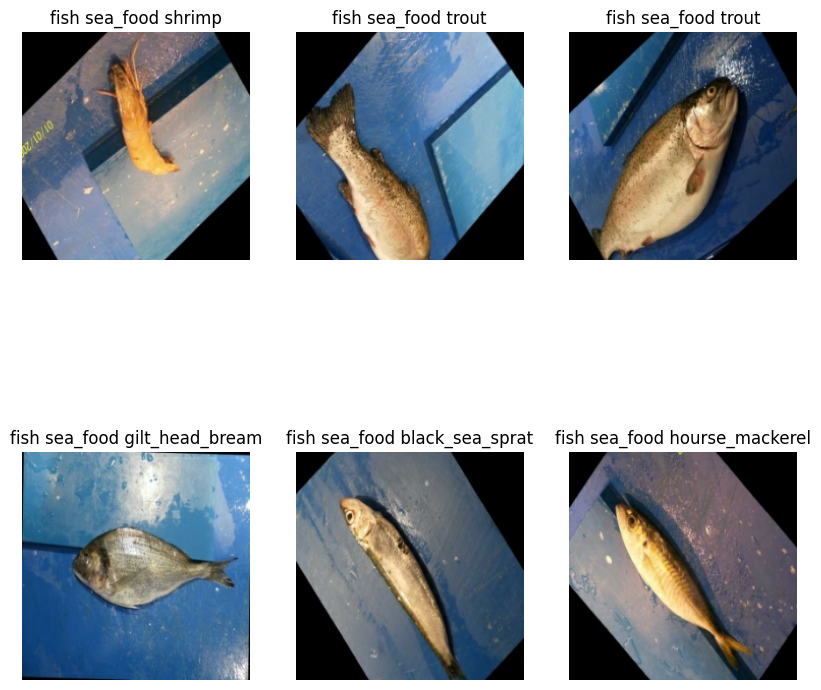

In [ ]:
plt.figure(figsize=(10,10))  # Setting figure size

# Taking one batch of images and labels from the training dataset
for images, labels in train_data.take(1):
  for i in range(6):  # Looping through the first 6 images in the batch
    plt.subplot(2, 3, i + 1)  # Creating a 2x3 grid of subplots
    plt.imshow(np.squeeze(images[i].numpy().astype('uint8')))  # Displaying image
    plt.title(train_data.class_names[labels[i]])  # Showing class name as title
    plt.axis('off')  # Hiding tick marks etc.


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE # Optimizing performance by letting TensorFlow choose the best buffer size

train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)# it will take the data in memory for faster training
valid_data = valid_data.cache().prefetch(buffer_size=AUTOTUNE)
test_data = test_data.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Model Building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# Input normalization layer
model.add(Rescaling(1./255, input_shape=(224, 224, 3)))  # Normalize pixel values

# First Conv block
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D())

# Second Conv block
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D())

# Third Conv block
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D())

# Fully connected layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(11, activation='softmax')) # Multiclass classification


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# compiling the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
model.fit(train_data, validation_data=valid_data, epochs=5) #Traning the model

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 718s 4s/step - accuracy: 0.5142 - loss: 1.4330 - val_accuracy: 0.8745 - val_loss: 0.4077
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 733s 4s/step - accuracy: 0.8881 - loss: 0.3346 - val_accuracy: 0.9194 - val_loss: 0.3049
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 712s 4s/step - accuracy: 0.9575 - loss: 0.1334 - val_accuracy: 0.8855 - val_loss: 0.3870
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 733s 4s/step - accuracy: 0.9664 - loss: 0.0985 - val_accuracy: 0.9359 - val_loss: 0.3194
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 697s 4s/step - accuracy: 0.9769 - loss: 0.0627 - val_accuracy: 0.9441 - val_loss: 0.2908


In [ ]:
model.evaluate(test_data) # evaluating the model

100/100 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.9590 - loss: 0.2172


[0.23654401302337646, 0.9563853144645691]